<a href="https://colab.research.google.com/github/RusMermaid/Data_science_course_teaching/blob/main/L6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
pd.set_option('display.max_columns', 100)

# Как дерево решений разделит кошек и собак

In [ ]:
df_train = pd.read_csv('cats_dogs.csv')
df_test = pd.read_csv('cats_dogs_test.csv')

In [ ]:
df_train

,type,weights,length,gender,label
0,Персидская кошка,6.0,12,1,0
1,Сибирская кошка,5.0,5,1,0
2,сфинкс,4.0,0,0,0
3,Сиамская кошка,4.5,1,0,0
4,Мейн-кун,7.0,10,0,0
5,Шелти,7.0,10,1,1
6,Немецкая овчарка,30.0,5,1,1
7,Карликовая короткошерстная такса,5.0,2,0,1
8,Чи хуа хуа,2.0,5,0,1
9,дог,50.0,0,1,1


Импортируем библиотеки, определим имена колонок с признаками и создадим множества для обучения и тестирования и их метки

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
feature_names = ['weights', 'length', 'gender']
X_train = df_train[['weights', 'length','gender']]
y_train = df_train['label']

X_test = df_test[['weights', 'length','gender']]
y_test = df_test['label']

Научим дерево решений

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Протестируем модель на обучающем и тестовом множествах и посчитаем правильность - долю правильных ответов среди всех ответов

In [ ]:
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print("Правильность на обучающем наборе: {:.3f}".format(accuracy_train))
print("Правильность на тестовом наборе: {:.3f}".format(accuracy_test))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.800


Видим, что на обучающем наборе дерево правильно отвечает в 100% случаев - то есть, правильно классифицирует все примеры

На тестовом наборе оно работает хуже - всего 80% правильных ответов

Давайте визуализируем дерево и посмотрим на него

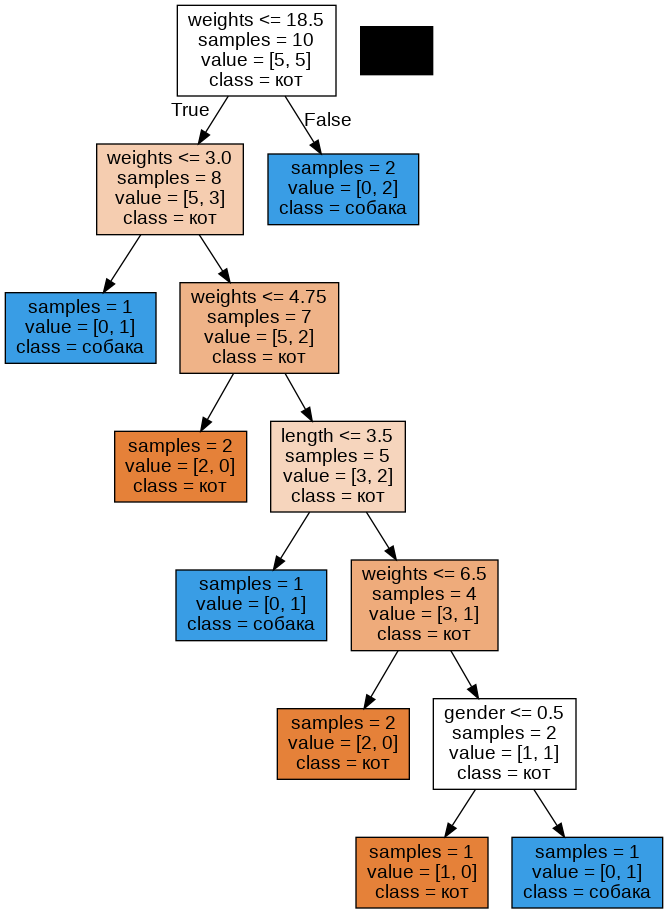

In [ ]:
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(clf, class_names=["кот", "собака"], feature_names=X_train.columns, impurity=False, filled=True,out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('df_train.pdf')
graph.write_png('df_train.png')
Image(graph.create_png())

Видно, что на предпоследнем уровне кот и собака разделены по признаку - пол.

Девочка - кот, мальчик - собака. Как вы думаете, значимый ли это признак?

посмотрим еще раз на обучающие данные:

In [ ]:
df_train

,type,weights,length,gender,label
0,Персидская кошка,6.0,12,1,0
1,Сибирская кошка,5.0,5,1,0
2,сфинкс,4.0,0,0,0
3,Сиамская кошка,4.5,1,0,0
4,Мейн-кун,7.0,10,0,0
5,Шелти,7.0,10,1,1
6,Немецкая овчарка,30.0,5,1,1
7,Карликовая короткошерстная такса,5.0,2,0,1
8,Чи хуа хуа,2.0,5,0,1
9,дог,50.0,0,1,1


Обратите внимание, что собака шелти и кот Мейн-кун имеют совершенно одинаковые значимые признаки веса и длины шерсти. Их невозможно разделить по ним.

Но шелти - мальчик, а мейн-кун - девочка. 

Дерево, которое мы не ограничивали в росте, стало слишком сложным (6 уровней). В конце концов, оно разделило классы по признаку пола - достаточно случайному.

Это позволило дереву идеально сработать на трейне, но уменьшило его обобщающую способность на тесте.

Давайте посмотрим теперь на тестовое множество и исследуем, почему модель на нем работает хуже:

In [ ]:
df_test

,type,weights,length,gender,label
0,Персидская кошка,6.0,12,0,0
1,Сибирская кошка,5.0,5,0,0
2,сфинкс,4.0,0,1,0
3,Сиамская кошка,4.5,1,1,0
4,Мейн-кун,7.0,10,1,0
5,Шелти,7.0,10,0,1
6,Немецкая овчарка,30.0,5,0,1
7,Карликовая короткошерстная такса,5.0,2,1,1
8,Чи хуа хуа,2.0,5,1,1
9,дог,50.0,0,0,1


Обратите внимание, что в этом игрушечном примере данные теста полностью совпадают с данными трейна и отличаются только одним признаком: пол (gender) изменен на противоположный.

И дерево начинает ошибаться.

В этом случае говорят, что модель переучена.

Это значит, что модель слишком старалась идеально сработать на трейне, использовала для этого даже не значимые признаки. И ее обобщающая способность (то есть, спосоюность работать на новых данных) стала ниже

Давайте попробуем побороться с переобучением.

Для этого запретим дереву становиться слишком глубоким, слишком подстраиваться к обучающему множеству.

Поставим порог ограничивающий максимальную глубину 4мя уровнями

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(clf.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(clf.score(X_test, y_test)))


Правильность на обучающем наборе: 0.900
Правильность на тестовом наборе: 0.900


Смотрите, ограничив дерево в росте мы запретили ему становиться слишком сложным. Оно не смогло добиться 100% правильных ответов, не разделило шелти и мейн-куна.

Но зато на новых данных оно работает лучше, чем в предыдущем примере.

Посмотрим на визуализацию:

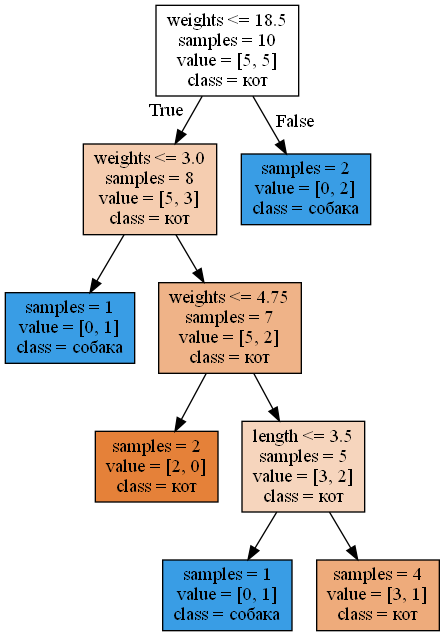

In [ ]:
dot_data = tree.export_graphviz(clf, class_names=["кот", "собака"], feature_names=X_train.columns, impurity=False, filled=True,out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('df_train.pdf')
graph.write_png('df_train.png')
Image(graph.create_png())

# Важное замечание:

Вспомните, что мы говорили про связь размера обучающего набора с переобучением.

В реальной жизни, если бы мы строили модель для различения кошег и собак , мы бы собрали большой рабор данных, не из 10 примеров, а из 10 тысяч.

В наших данных были бы представлены разные девочки и мальчики разных пород кошек и собак. И тогда признак пола имел бы значение, так как, в среднем вес животных мальчиков больше веса животных девочек. Он мог бы помочь различить животных при прочих равных условиях